In [1]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.        ]
a = 1.8531667261047913, b = 1.5312904682995265


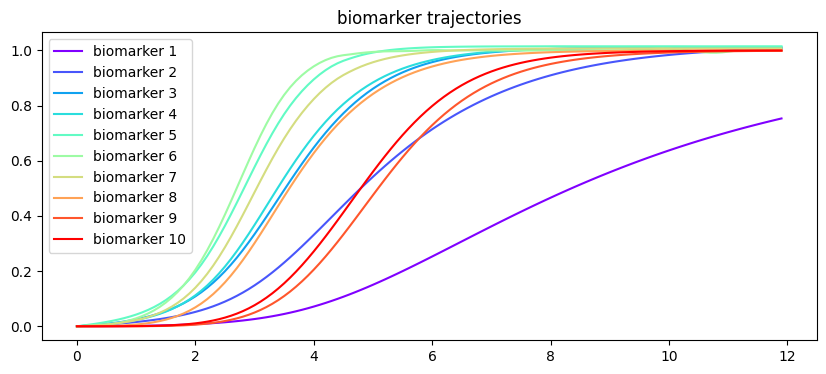

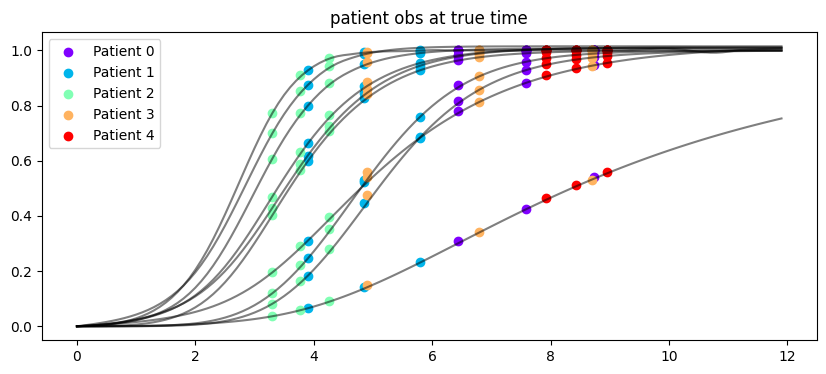

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 10%|█         | 2/20 [00:08<01:18,  4.36s/it]

 95%|█████████▌| 19/20 [05:24<00:17, 17.09s/it]


SUMMARY:
best LSE at iteration 19: 1.6834141250001688
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.49938398e-03 1.72634690e-02
 2.87512953e-02 2.72292403e-02 5.91902013e-02 2.30424963e-02
 2.76436622e-02 7.20404185e-03 4.87076932e-04 1.05570800e-03
 9.98581152e-01 1.01422853e+00 1.00623269e+00 1.00599945e+00
 1.00475581e+00 9.99491347e-01 1.00340931e+00 9.99861974e-01
 9.98567477e-01 9.99056766e-01 1.01431596e+00]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 

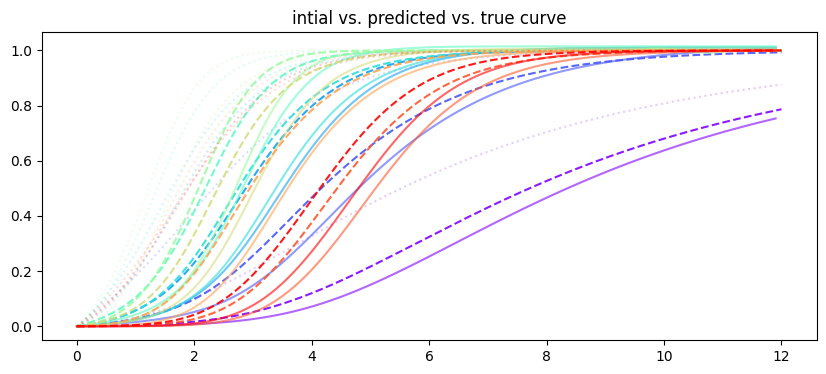

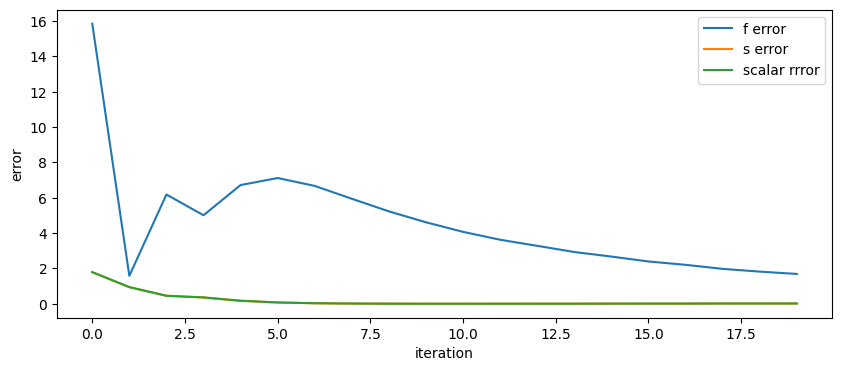

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


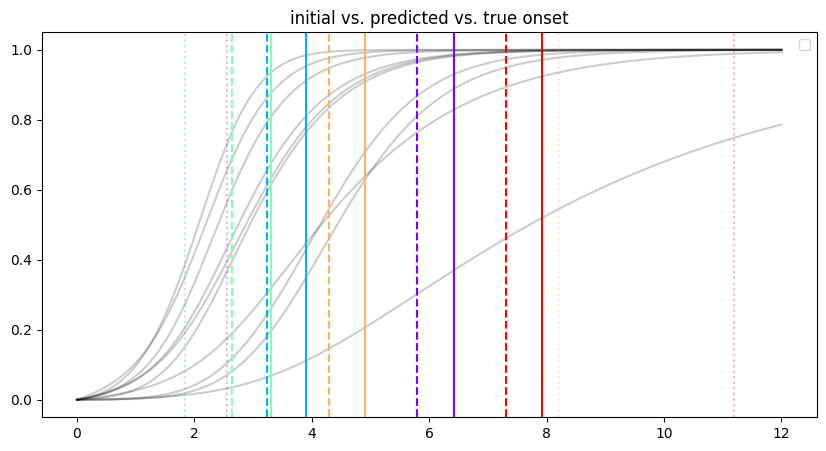

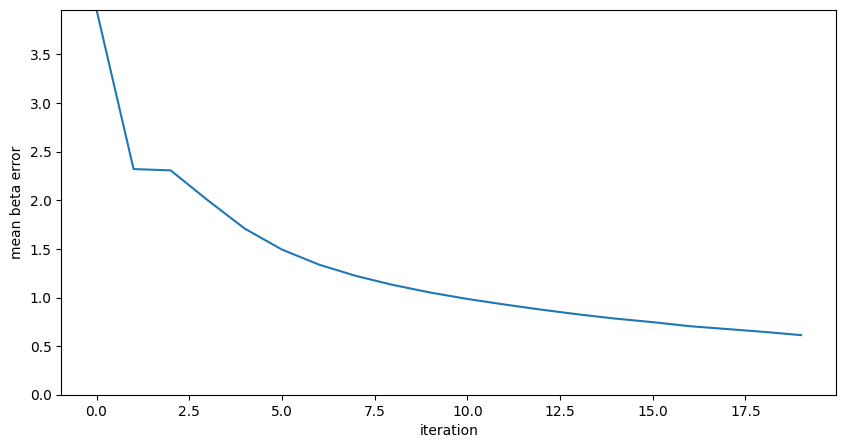

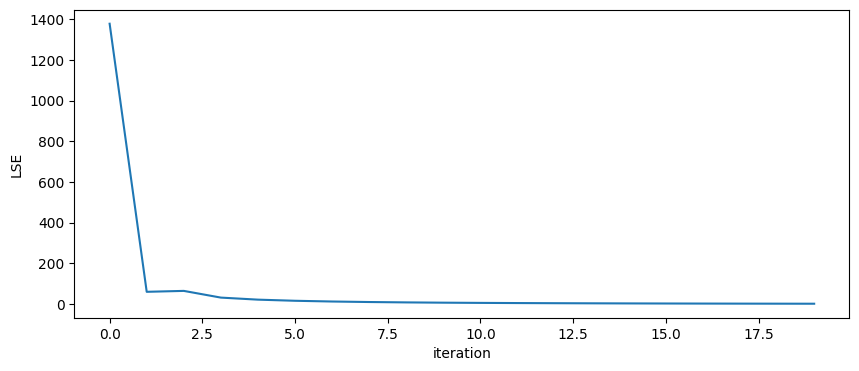

In [2]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


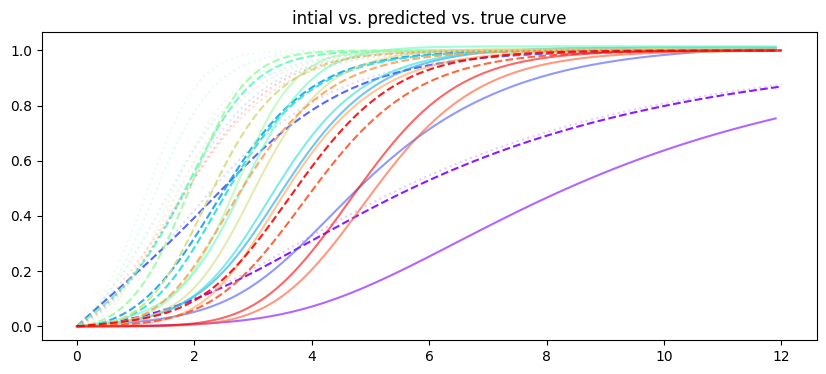

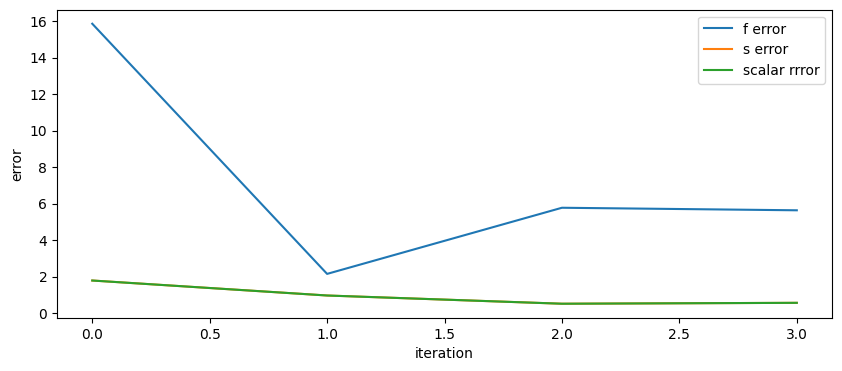

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


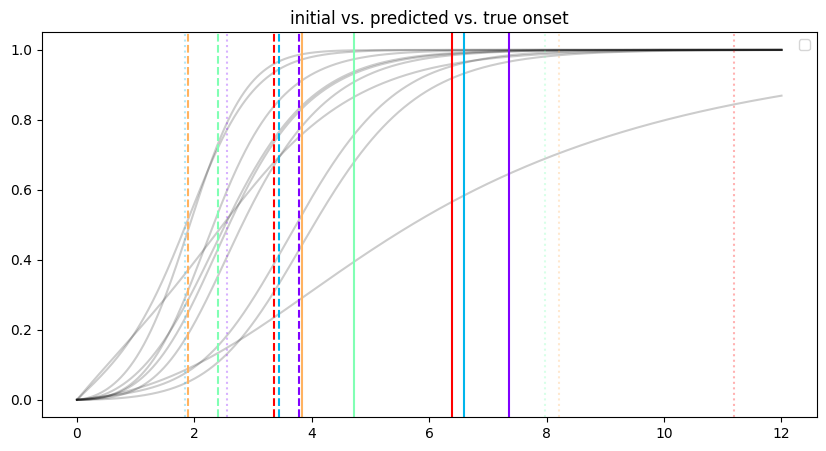

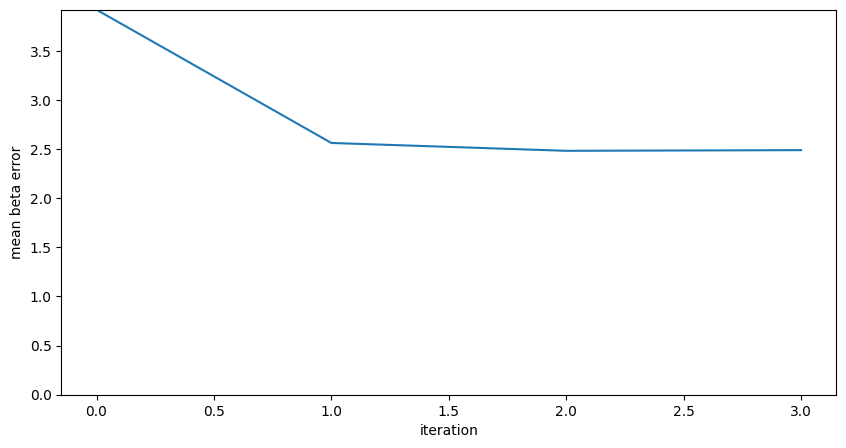

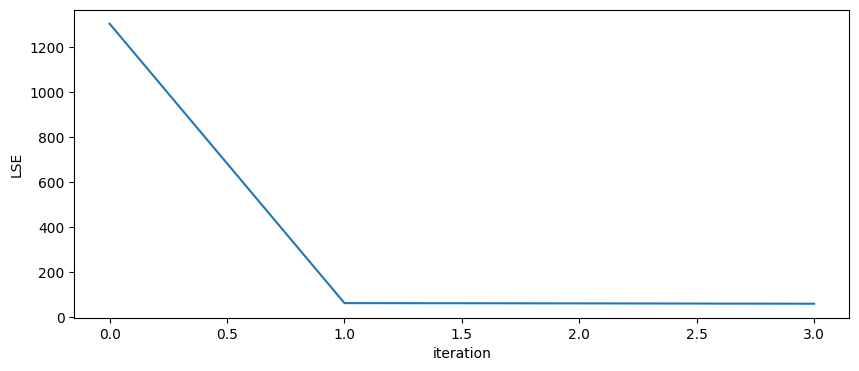

In [ ]:
em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.01,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


#cog = 0.01

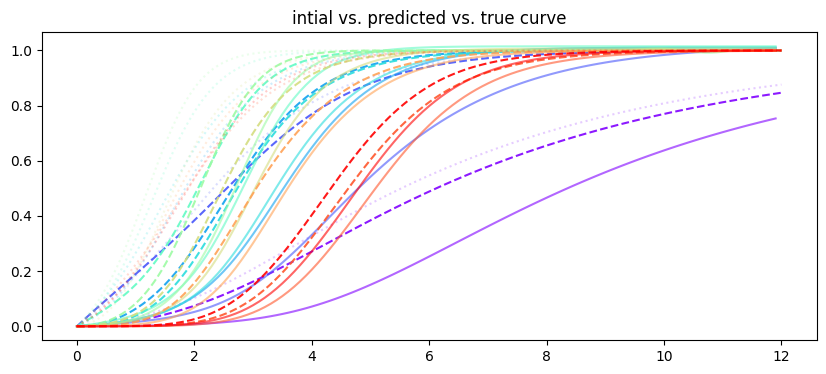

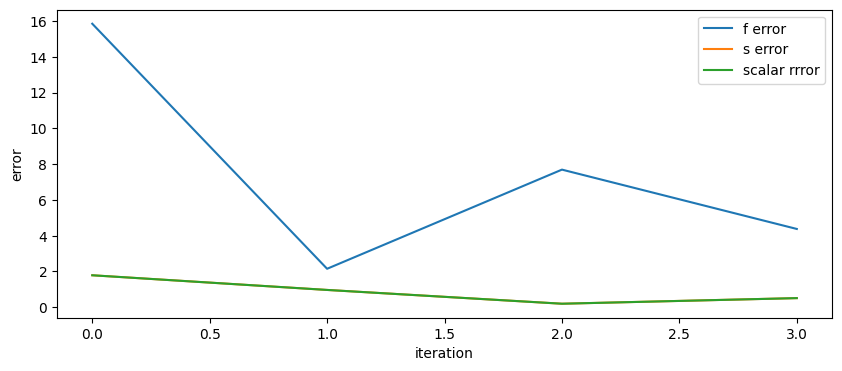

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


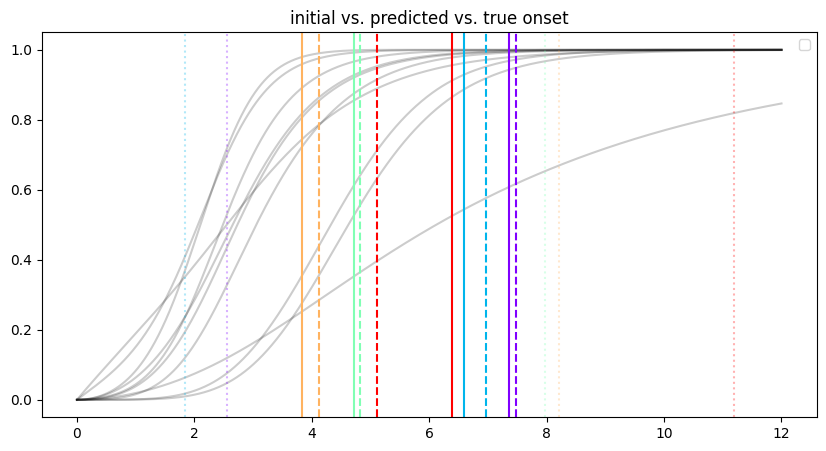

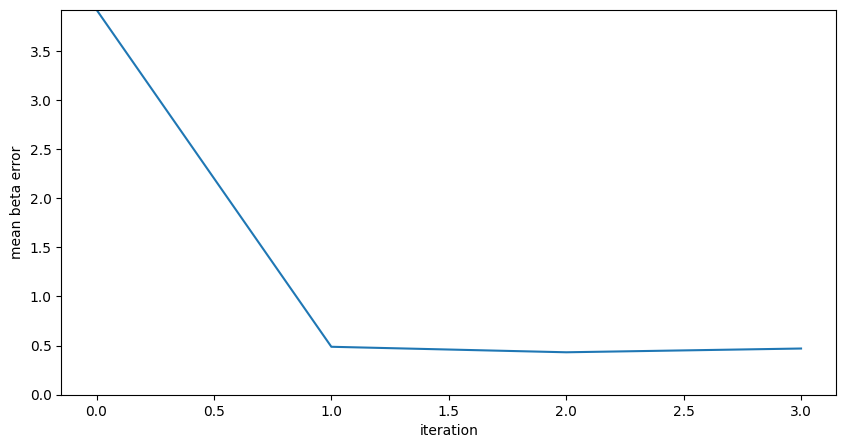

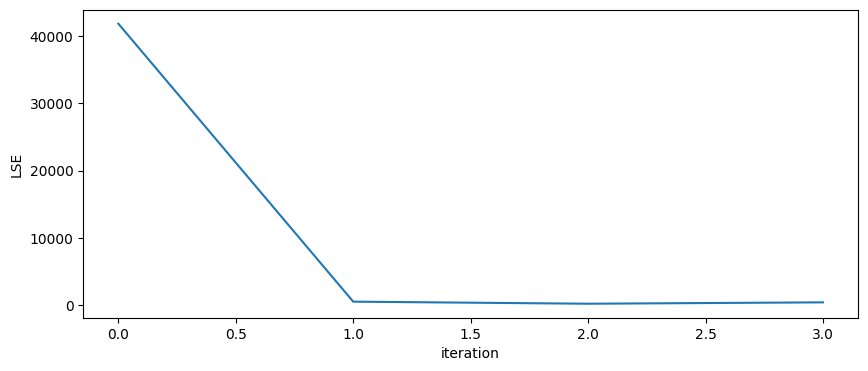

In [ ]:
em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.1,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## alpha = 0.1

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [04:02<00:00,  4.85s/it]


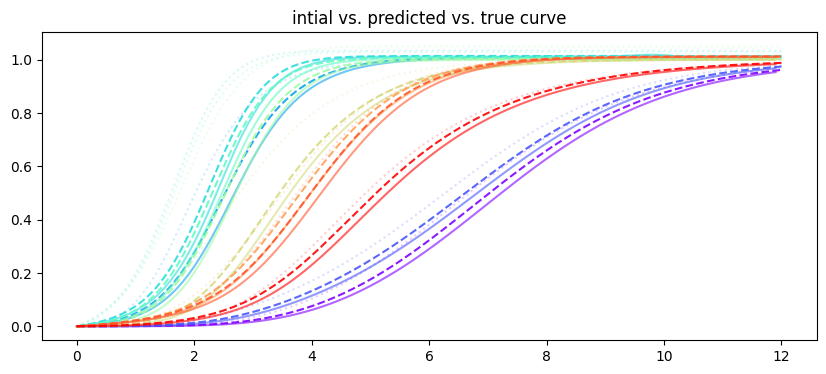

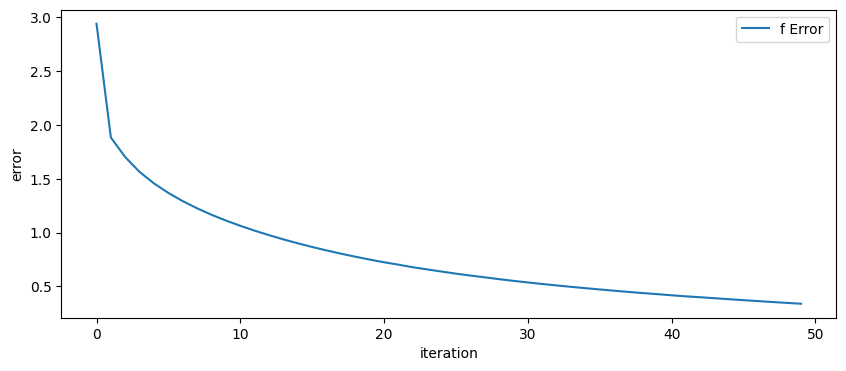

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


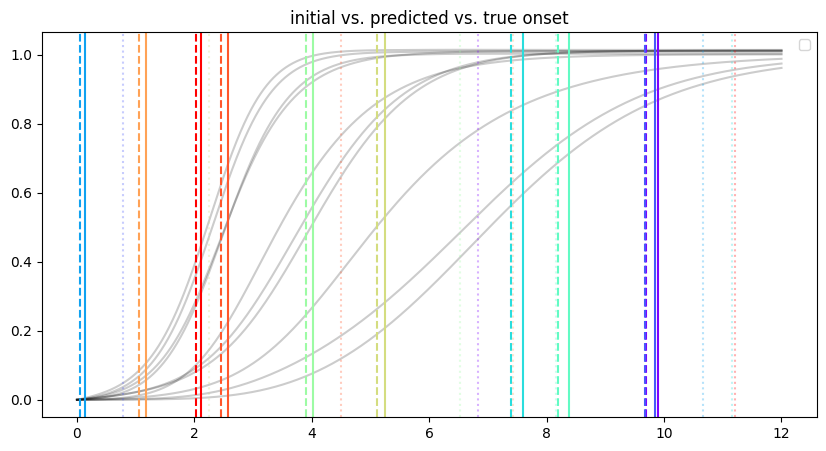

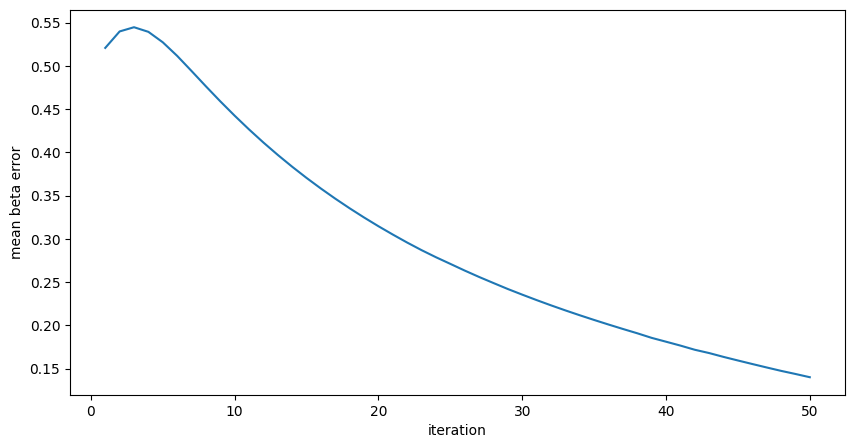

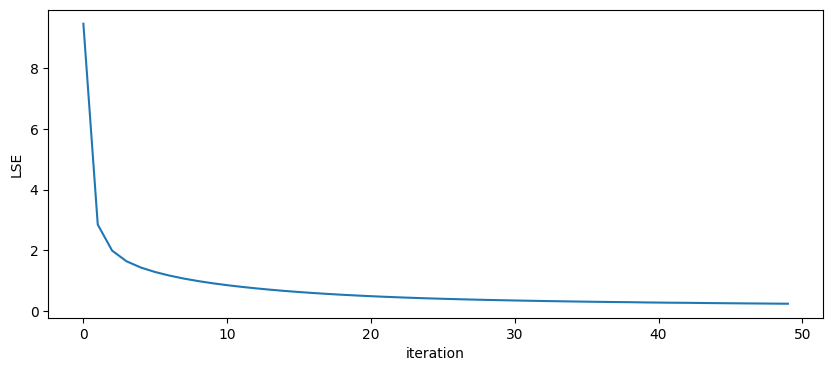

In [ ]:
em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=1.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## alpha = 1.0

100%|██████████| 50/50 [03:47<00:00,  4.54s/it]


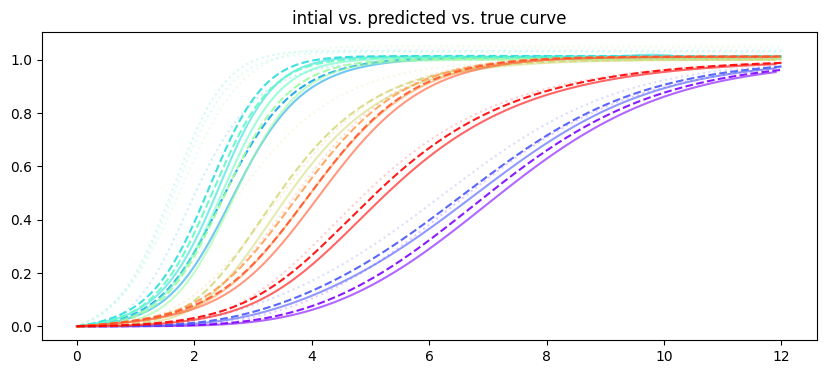

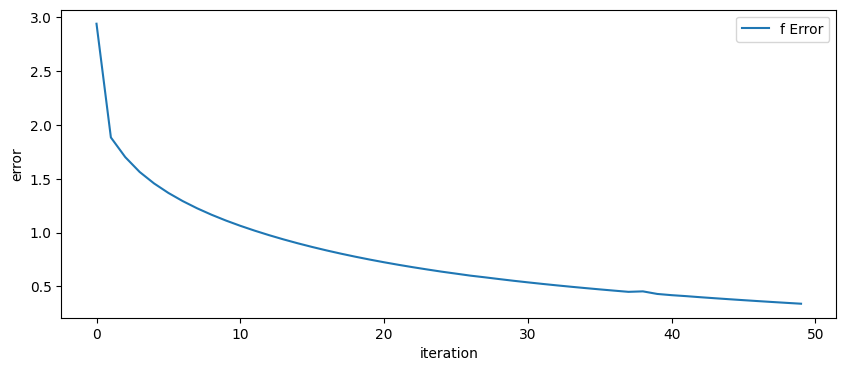

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


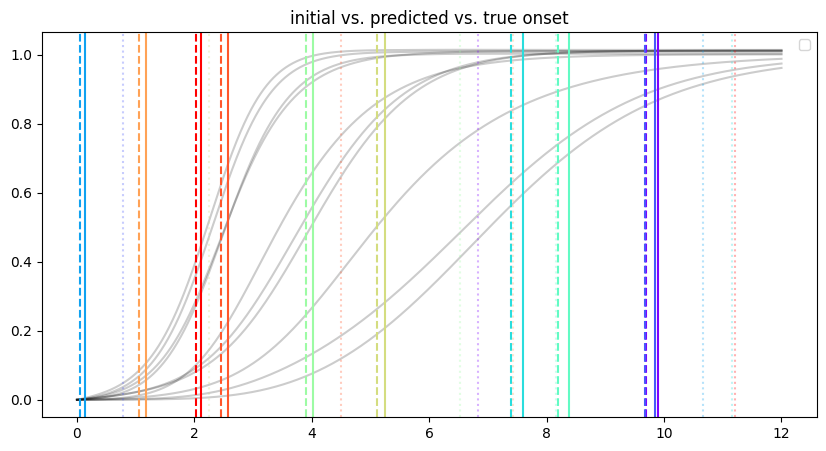

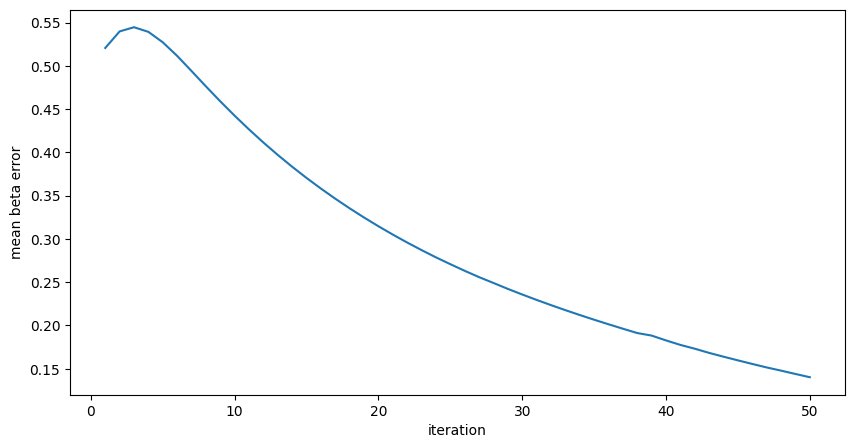

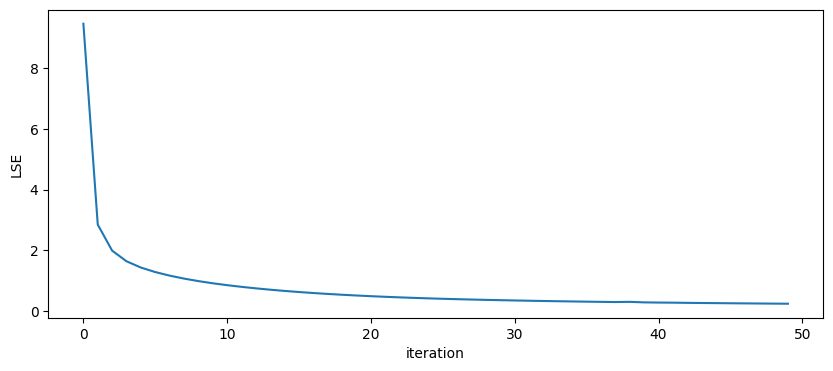

In [ ]:
em_model_0 = EM(K=K,
              num_iterations=20,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=10.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)
